# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv('singapore_airlines_reviews.csv')

df.head(10)



,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
5,2024-03-10T01:16:48-05:00,Desktop,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0
6,2024-03-10T00:54:43-05:00,Desktop,5,review,This was a fascinating experience. As I sat in...,WOAH. FLY WITH SQ,0
7,2024-03-09T17:45:56-05:00,Desktop,1,review,Very bad expeirence for flight check in at bai...,Long Q to check in,0
8,2024-03-08T23:10:41-05:00,Desktop,1,review,"Respected Faculty, I am Bincy, writing this t...","Very bad, disappointed",0
9,2024-03-08T19:18:57-05:00,Desktop,1,review,I would rate Singapore airlines the worse I ha...,Give Singapore airlines a miss.,1


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the singapore airlines reviews data set.
2. I will be predicting the rating given by a customer based on other features in the dataset. The label will be the rating column. 1 is the lowest rating and 5 is the highest rating.
3. This is a supervised learning problem. It is a multi-class classifcation problem as there are 5 possible classes that the label 'rating' can be (1,2,3,4,5)
4. Features are published_platform, text,title, helpful votes. Type only has one unique value (review) so doesn't have any predictive value and the date
5. This is an important problem because the company can have a better understanding of reviews, particularly negative reviews. By understanding which kinds of reviews are 1s and 2s, they can understand where to improve.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

First, it is important to gauge the completeness of the data. To do this, a check will be conducted to see if there are any null/missing values in any of the columns.

In [3]:
nan_count= np.sum(df.isnull(),axis=0)
nan_count
# This line of code sums up all the null values per column.
# Through the output below, it is clear that there are no null values- 
# as all columns have 0 null values

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 0
helpful_votes         0
dtype: int64

Next, understanding correlation between features and the label can help in seeing which features will have the most predictive value. As this is a sentiment analysis orienteted task that involves understanding the text, my prediction is that there will likely be very low correlations between the non-text features and the label '

In [4]:
# First, an inspection of the data type of each feature will be conducted
df.dtypes

published_date        object
published_platform    object
rating                 int64
type                  object
text                  object
title                 object
helpful_votes          int64
dtype: object

In [5]:
# The only feature that is not an object (and hence a correlation can be found) is helpful_votes
# Therefore, I will check the correlation between helpful_votes and the rating label
df['helpful_votes'].corr(df['rating'])

-0.1192886772210416

In [6]:
# This value indicates a low negative linear correaltion between helfpul_votes and rating
df_corr1 = pd.DataFrame({'helpful votes': df['helpful_votes'],'rating': df['rating']})
df_corr1

,helpful votes,rating
0,0,3
1,0,5
2,0,1
3,0,5
4,0,2
...,...,...
9995,1,5
9996,1,5
9997,1,5
9998,2,4


To better visualize the correlation, a scatterplot will be created.

<AxesSubplot: >

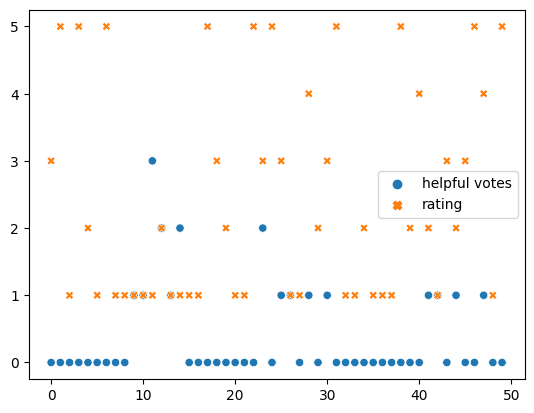

In [7]:
sns.scatterplot(data=df_corr1[:50])

In [8]:
# Let's see how many unique values there are in 'helpful votes'
print(df['helpful_votes'].unique())
# Let's also see how many of each unique value there are in 'helpful votes'
vc=df['helpful_votes'].value_counts()
print(vc)

[  0   1   3   2   4  12   7   5  21   6   9   8  10  35  27 108  25  61
  11 158  90  29  41  43  56  17  24]
1      3493
0      3091
2      2481
3       564
4       190
5        77
6        38
7        17
8        10
9         8
10        7
12        4
27        3
11        3
21        2
29        1
17        1
56        1
43        1
41        1
35        1
90        1
158       1
61        1
25        1
108       1
24        1
Name: helpful_votes, dtype: int64


In [9]:
# It is also important to ensure class imbalance doesn't occur
# Let's see how many of each type of review there is
vcRating= df['rating'].value_counts()
print(vcRating)
# Let's sort it from lowest to highest so that it is clearer which rating has lower reviews
print (vcRating.sort_values())

5    5424
4    1967
1    1057
3    1009
2     543
Name: rating, dtype: int64
2     543
3    1009
1    1057
4    1967
5    5424
Name: rating, dtype: int64


5 is overrepresented in the ratings data and 2 is slightly underrepresented.
Let's inspect the other columns

In [10]:
vcType= df['type'].value_counts()
vcPlatform= df['published_platform'].value_counts()
print (vcType)
print (vcPlatform)

review    10000
Name: type, dtype: int64
Desktop    7352
Mobile     2648
Name: published_platform, dtype: int64


There is only one unique value in the column type- that is 'review'
Therefore, this column should be dropped when creating the model
There are more desktop reviews than mobile reviews. However, since this is type 'object'- I can't measure correlation.

Correlation between device type and the rating label can be performed with one-hot encoding. 

In [11]:
df_platform= pd.get_dummies(df['published_platform'], prefix= 'platform_')
df_platform

,platform__Desktop,platform__Mobile
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,0,1
9997,1,0
9998,1,0


In [12]:
# Let's add this to the main dataframe using the join function
df= df.join(df_platform)
# Remove the orignal published platform column from the dataframe
df.drop(columns='published_platform',inplace=True)
df.head(10)

,published_date,rating,type,text,title,helpful_votes,platform__Desktop,platform__Mobile
0,2024-03-12T14:41:14-04:00,3,review,We used this airline to go from Singapore to L...,Ok,0,1,0
1,2024-03-11T19:39:13-04:00,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,1,0
2,2024-03-11T12:20:23-04:00,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,1,0
3,2024-03-11T07:12:27-04:00,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,1,0
4,2024-03-10T05:34:18-04:00,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,1,0
5,2024-03-10T01:16:48-05:00,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0,1,0
6,2024-03-10T00:54:43-05:00,5,review,This was a fascinating experience. As I sat in...,WOAH. FLY WITH SQ,0,1,0
7,2024-03-09T17:45:56-05:00,1,review,Very bad expeirence for flight check in at bai...,Long Q to check in,0,1,0
8,2024-03-08T23:10:41-05:00,1,review,"Respected Faculty, I am Bincy, writing this t...","Very bad, disappointed",0,1,0
9,2024-03-08T19:18:57-05:00,1,review,I would rate Singapore airlines the worse I ha...,Give Singapore airlines a miss.,1,1,0


In [13]:
# Now, let's see the correlation between the device type and the rating
columns_of_interest = ['platform__Desktop', 'platform__Mobile', 'rating']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,platform__Desktop,platform__Mobile,rating
platform__Desktop,1.000000,-1.000000,-0.064015
platform__Mobile,-1.000000,1.000000,0.064015
rating,-0.064015,0.064015,1.000000


There is a very low negative linear correlation between desktop and rating. There is a very low positive linear correlation between mobile and rating.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I am considering dropping the date and type columns. In the type column, there is only one unique value 'review' and hence it generates no predictive value. Although there are low linear correlations between certain features and the label, there is a chance that there is a non-linear correlation that can be found and hence it does not automatically exclude it from the list.
2. One-hot encoding was conducted in part 3. It is also important to reduce class imbalance to reduce bias in the data and hence this will be an important step in the data preparation process. Text features will be vectorized using TF-IDF
3. I plan on utilizing three models: Logistic Regression, Random Forest Decision Trees, and a Neural Network.
4. For each model, I will ensure to tune hyperparameters. For Random Forest, I plan on utilizing GridSearch CV to do so whereas for logistic regression I will measure accuracy rates under different parameters for C to find the best C value. I will evaluate the models' performance using different metrics such as log loss, accuracy, RMSE, and R squared scores. Performance will be further analyzed with confusion matrices and graphs, for instance log loss test performance for logistic regression and training and validation loss for the neural network.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time
from sklearn.utils import resample
import scipy.sparse as scipy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Input, Dense, concatenate
from keras.models import Model
import tensorflow as tf
from sklearn.metrics import confusion_matrix

2024-07-31 20:30:20.911248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-31 20:30:20.911274: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

First, I want to make it so that the majority class is downsampled/undersampled and the minoirty class is oversampled while the remaining classes are oversampled/undersampled. I want to make it so that there is an equal amount of each rating. I read up online how to do this, source: https://medium.com/@tam.tamanna18/handling-imbalanced-datasets-in-python-methods-and-procedures-7376f99794de#:~:text=Libraries%20like%20Pandas%20are%20essential%20for%20this.&text=The%20most%20common%20approaches%20for,(decreasing%20majority%20class%20samples).

In [15]:
class_5 = df[df['rating'] == 5]
class_4 = df[df['rating'] == 4]
class_3 = df[df['rating'] == 3]
class_2 = df[df['rating'] == 2]
class_1 = df[df['rating'] == 1]

target_size = len(class_4)

# Downsample majority class (rating 5)
class_5_downsampled = resample(class_5,
                               replace=False,  
                               n_samples=target_size,  
                               random_state=42)  

# Upsample minority class (rating 2)
class_2_upsampled = resample(class_2,
                             replace=True,  
                             n_samples=target_size,  
                             random_state=42)  

# upsample  other minority classes to create balance
class_1_upsampled = resample(class_1,
                             replace=True,  
                             n_samples=target_size,  
                             random_state=42) 

class_3_upsampled = resample(class_3,
                             replace=True,  
                             n_samples=target_size,  
                             random_state=42)  

# Combine all classes back into a single dataframe named balanced data
balanced_data = pd.concat([class_5_downsampled, class_4, class_3_upsampled, class_2_upsampled, class_1_upsampled])

print(balanced_data['rating'].value_counts())
# make df equal to the new dataframe created
df= balanced_data
df.head(30)

5    1967
4    1967
3    1967
2    1967
1    1967
Name: rating, dtype: int64


,published_date,rating,type,text,title,helpful_votes,platform__Desktop,platform__Mobile
9720,2018-08-28T21:37:18-04:00,5,review,Kudos to the pilot and first officer teams for...,SQ326 - 10 August 2018 - Pleasant and smooth ride,1,0,1
9600,2018-09-08T17:39:04-04:00,5,review,"I flew SIA after some years, and looked forwar...",Still the best.....,0,1,0
6220,2019-03-24T05:49:51-04:00,5,review,Singapore Airlines have always been a personal...,Indeed a great way to fly,2,0,1
7620,2018-12-18T03:59:57-05:00,5,review,One of the best services on economy.It was a t...,Long haul flight,0,1,0
3497,2019-09-19T23:16:13-04:00,5,review,It was very good trip to use singapore airline...,Excellent service,1,1,0
8400,2018-11-04T21:09:17-05:00,5,review,The Flight to LAX via Narita is one of the bes...,Simply the best in long distance travel,0,1,0
7127,2019-01-19T08:05:01-05:00,5,review,smooth flight from singapore to dusseldorf; ti...,smooth flight,2,1,0
4516,2019-07-10T17:00:05-04:00,5,review,Had the pleasure of flying with Singapore Airl...,Most helpful crew,2,1,0
9120,2018-09-18T19:07:34-04:00,5,review,"From check-in to inflight, SIA crews are very ...",Truly A Great Way to Fly,0,1,0
5669,2019-05-01T14:16:48-04:00,5,review,I have flown on Singapore Airlines for over 20...,Singapore Airlines SIA,0,1,0


The data is not shuffled, this can lead to issues during training especially since the whole dataset may not be used. To do this, I used the following sources: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [16]:
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
df= balanced_data
df.head(10)

,published_date,rating,type,text,title,helpful_votes,platform__Desktop,platform__Mobile
0,2019-09-09T08:43:23-04:00,1,review,"With a 5 hour stopover in Changi, I registered...",Very unsatisfactory journey,5,0,1
1,2022-05-05T14:49:42-04:00,1,review,I was on the phone with your KrisFlyer custome...,2.5 Hours On Hold with KrisFlyer Customer Service,0,1,0
2,2019-08-31T05:23:00-04:00,4,review,I always look forward to flying on Singapore A...,A trip of two halves,2,1,0
3,2018-12-05T09:25:29-05:00,2,review,We pay to go business on long haul so that we ...,Unsuitable business class beds,0,1,0
4,2019-04-08T00:23:48-04:00,5,review,it was amazing experience .. to fly for the fi...,one of the best airlines,4,1,0
5,2019-02-14T23:03:54-05:00,3,review,"We were in premium economy. From SYD to SIN, ...",Good one way; average on the way back,1,1,0
6,2022-07-10T21:48:04-04:00,2,review,My wife and I recently flew to and from Sydney...,Singapore Airlines Premium Economy - not worth...,4,1,0
7,2019-01-03T13:45:46-05:00,4,review,Aircraft is not much convenient. But their ser...,Friendly service,0,0,1
8,2019-05-05T02:07:41-04:00,1,review,I flew them from Singapore to Tokyo. First off...,"Simply put, “Not the best”.",7,0,1
9,2020-02-13T20:21:01-05:00,2,review,Before reading this review please note that th...,Start and end your holiday on a low!,4,0,1


Dropping irrelevant features that add no predictive value:

In [17]:
df=df.drop(columns=['published_date','type'],axis=1)

Specify columns

In [18]:
text_columns = ['text', 'title']
other_columns = [col for col in df.columns if col not in text_columns + ['rating']]

Create Training and Test Data Sets, seperating text columns from non-text columns to aid the vectorization process(the sets will be combined later)

In [19]:
X_train_text, X_test_text, y_train, y_test = train_test_split(df[text_columns], df['rating'], test_size=0.25, random_state=1234)
X_train_other=df.loc[X_train_text.index,other_columns]
X_test_other=df.loc[X_test_text.index,other_columns]

Implement TF-IDF Vectorizer to Transform Text

In [20]:
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_vectorizer2 = TfidfVectorizer()
#Two vectorizers as there are two text columns
X_train_tfidf1 = tfidf_vectorizer1.fit_transform(X_train_text['text'])
X_train_tfidf2 = tfidf_vectorizer2.fit_transform(X_train_text['title'])
X_test_tfidf1 = tfidf_vectorizer1.transform(X_test_text['text'])
X_test_tfidf2 = tfidf_vectorizer2.transform(X_test_text['title'])

Combine TF-IDF features with other features
Source: https://stackoverflow.com/questions/63417829/how-to-concatenate-two-tf-idf-vectors-as-well-as-other-features-that-can-be-fed

https://stackoverflow.com/questions/20459536/convert-pandas-dataframe-to-sparse-numpy-matrix-directly

In [21]:
X_train_other_sparse= scipy.csr_matrix(X_train_other.values)
X_test_other_sparse= scipy.csr_matrix(X_test_other.values)

X_train_combined= scipy.hstack([X_train_tfidf1, X_train_tfidf2, X_train_other_sparse])
X_test_combined= scipy.hstack([X_test_tfidf1, X_test_tfidf2, X_test_other_sparse])

Approach 1: Logistic Regression

In [22]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(max_iter=500,C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions) 
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return l_loss, acc_score

In [23]:
loss, acc = train_test_LR(X_train_combined, y_train, X_test_combined, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.7100358884441857
Accuracy: 0.7698251321675478


Logistic Regression- Experimenting with Different Hyperparameters

In [24]:
cs = [10**i for i in range(-10,10)]
ll_cs = []
acc_cs = []
for c in cs:
    ll, acc = train_test_LR(X_train_combined, y_train, X_test_combined, y_test, c)
    print('c of {0}:\nlog loss of {1}\naccuracy score of {2}'.format(c, ll,acc))
    ll_cs.append(ll)
    acc_cs.append(acc)

c of 1e-10:
log loss of 1.609965712299422
accuracy score of 0.1939812932086214
c of 1e-09:
log loss of 1.6099653842281803
accuracy score of 0.1939812932086214
c of 1e-08:
log loss of 1.6099623119130522
accuracy score of 0.1939812932086214
c of 1e-07:
log loss of 1.6099315289790779
accuracy score of 0.1939812932086214
c of 1e-06:
log loss of 1.6096266505926142
accuracy score of 0.2277348515656771
c of 1e-05:
log loss of 1.6068736030541209
accuracy score of 0.27897519316795444
c of 0.0001:
log loss of 1.58945360262948
accuracy score of 0.2818218788125254
c of 0.001:
log loss of 1.5476937346284032
accuracy score of 0.30662871085807236
c of 0.01:
log loss of 1.425085776521673
accuracy score of 0.47010980073200487
c of 0.1:
log loss of 1.0833662253227172
accuracy score of 0.6506710044733631
c of 1:
log loss of 0.7100358884441857
accuracy score of 0.7698251321675478
c of 10:
log loss of 0.584242796941571
accuracy score of 0.7942252948352989
c of 100:
log loss of 0.72798847713746
accuracy sco

Highest accuracy score out of this set is with a c value of 10. Let's experiment with values closer to 10

In [25]:
cs_narrow = [i for i in range(1,10)]
ll_cs_narrow = []
acc_cs_narrow = []
for c in cs_narrow:
    ll, acc = train_test_LR(X_train_combined, y_train, X_test_combined, y_test, 4)
    print('c of {0}:\nlog loss of {1}\naccuracy score of {2}'.format(c, ll,acc))
    ll_cs_narrow.append(ll)
    acc_cs_narrow.append(acc)

c of 1:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 2:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 3:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 4:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 5:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 6:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 7:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 8:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491
c of 9:
log loss of 0.5919230005996207
accuracy score of 0.7991053273688491


Overall, the C value of 4 yields the highest accuracy rate of 79.9%

Let's visualize the log loss:

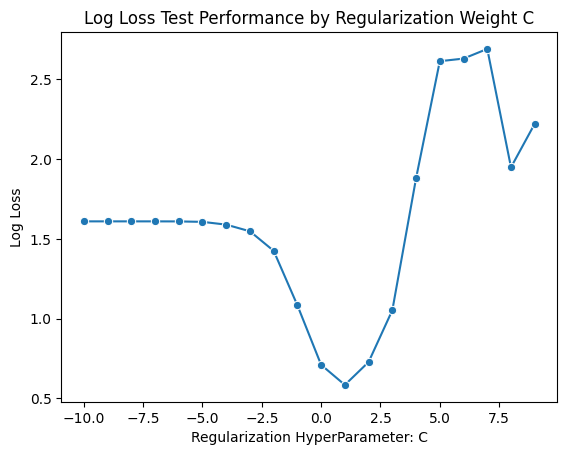

In [26]:
cs_log10 = np.log10(cs)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=cs_log10, y=ll_cs, marker='o')
plt.title('Log Loss Test Performance by Regularization Weight C')
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
plt.show()

Let's visualize the accuracy score

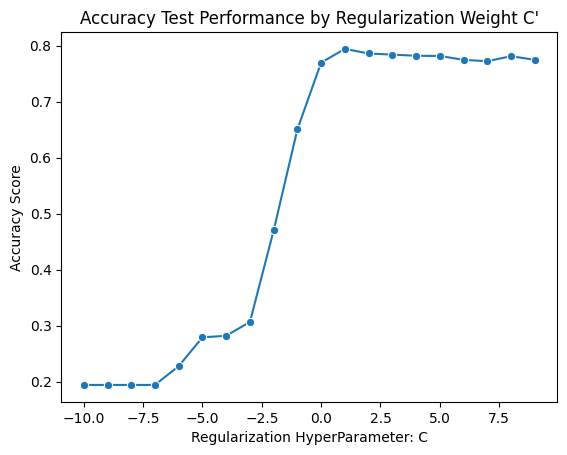

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=cs_log10, y=acc_cs, marker='o')
plt.title("Accuracy Test Performance by Regularization Weight C'")
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Accuracy Score')
plt.show()

Let's utilize a confusion matrix to further grasp the accuracy of the model

In [28]:
def predict_logistic_regression(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(max_iter=500,C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [29]:
y_pred= predict_logistic_regression(X_train_combined, y_train, X_test_combined, y_test, 4)
cm = confusion_matrix(y_test, y_pred)

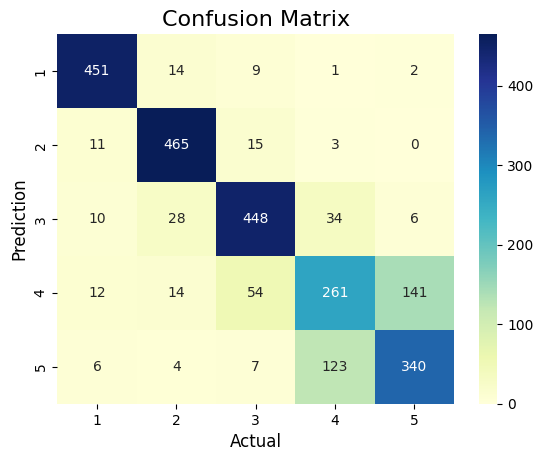

In [30]:
labels = ['1', '2', '3', '4', '5']
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu',xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

Approach 2: Random Forest

To search for the best hyperparameters for Random Forest, grid search will be utilized.

In [31]:
param_grid = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_leaf': [1, 2, 4]
}
param_grid

{'max_depth': [3, 5, 7, 10],
 'n_estimators': [100, 200, 300, 400, 500],
 'min_samples_leaf': [1, 2, 4]}

In [32]:
model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train_combined, y_train)


In [33]:
dt_best_params = grid_search.best_params_
dt_best_params

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 400}

In [34]:
dt_model = RandomForestClassifier(max_depth=dt_best_params['max_depth'],
                                  n_estimators= dt_best_params['n_estimators'],
                                  min_samples_leaf= dt_best_params['min_samples_leaf'])
dt_model.fit(X_train_combined, y_train)
y_dt_pred = dt_model.predict(X_test_combined)

In [35]:
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 1.0274792965106556
[DT] R2: 0.45961533903326846


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
accuracy_score(y_test, y_dt_pred )

0.6888979259861733

The accuracy fluctautes slightly upon each run of the program, ranging from 68-69%

Let's utilize a confusion matrix to better grasp the results:

In [37]:
cm = confusion_matrix(y_test, y_dt_pred)

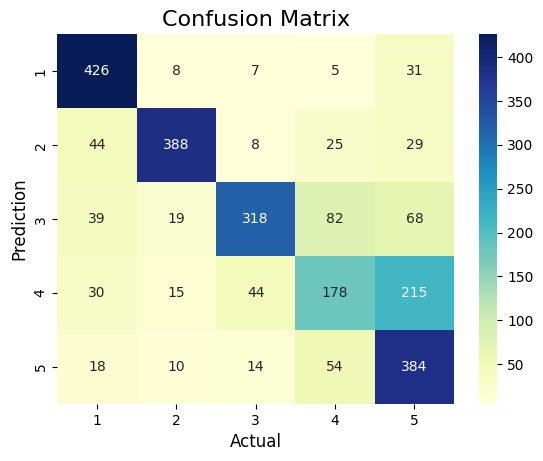

In [38]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu',xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

Approach 3: Neural Network

Only text features will be processed for the neural network hence non-text features will be dropped from the dataframe and the two text features will be combined.

In [39]:
df = df.drop(columns=['helpful_votes', 'platform__Desktop', 'platform__Mobile'])

In [40]:
def combine_columns(row):
    return str(row['title']+" ") + row['text']
df['review'] = df.apply(combine_columns, axis=1)

In [41]:
df= df.drop(columns=['title', 'text'])
df.head(10)

,rating,review
0,1,Very unsatisfactory journeyWith a 5 hour stopo...
1,1,2.5 Hours On Hold with KrisFlyer Customer Serv...
2,4,A trip of two halvesI always look forward to f...
3,2,Unsuitable business class bedsWe pay to go bus...
4,5,one of the best airlinesit was amazing experie...
5,3,Good one way; average on the way backWe were i...
6,2,Singapore Airlines Premium Economy - not worth...
7,4,Friendly service Aircraft is not much convenie...
8,1,"Simply put, “Not the best”. I flew them from S..."
9,2,Start and end your holiday on a low! Before re...


In [42]:
y = df['rating']
X = df['review']

In [43]:
X_train, X_test, y_train_nn, y_test_nn = train_test_split(X,y, test_size=0.25, random_state=1234)

In [44]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [45]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
vocabulary_size

18278

Defining model structure:

In [46]:
nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)
output_layer = keras.layers.Dense(units=6, activation='sigmoid')
nn_model.add(output_layer)
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1169856   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 1,172,566
Trainable params: 1,172,566
Non-trainable params: 0
_________________________________________________________________


2024-07-31 20:41:48.627300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-31 20:41:48.627326: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-31 20:41:48.627400: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0c19a526e7fd2d7ac): /proc/driver/nvidia/version does not exist
2024-07-31 20:41:48.627623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Defining the optimization function:

In [47]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

Defining the loss function:

In [48]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=False)

Compiling the model: 

In [49]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

Fitting the model on training data:

In [50]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [51]:
t0 = time.time() 
num_epochs = 55 

history = nn_model.fit(
X_train_tfidf.toarray(),
y_train_nn,
epochs=num_epochs,
verbose=0, 
validation_split=0.2,
callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
)
t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

2024-07-31 20:41:49.889409: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-31 20:41:49.893374: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [5/ 55], Loss: 1.1113, Accuracy: 0.4934, Val_loss: 1.1538, Val_accuracy: 0.4702
Epoch [10/ 55], Loss: 0.6997, Accuracy: 0.7237, Val_loss: 1.5374, Val_accuracy: 0.4099
Epoch [15/ 55], Loss: 0.4361, Accuracy: 0.8486, Val_loss: 5.7870, Val_accuracy: 0.2222
Epoch [20/ 55], Loss: 0.3347, Accuracy: 0.8942, Val_loss: 3.3680, Val_accuracy: 0.4092
Epoch [25/ 55], Loss: 0.2965, Accuracy: 0.9164, Val_loss: 0.6823, Val_accuracy: 0.7791
Epoch [30/ 55], Loss: 0.3104, Accuracy: 0.9171, Val_loss: 0.7874, Val_accuracy: 0.7676
Epoch [35/ 55], Loss: 0.3692, Accuracy: 0.9022, Val_loss: 0.7784, Val_accuracy: 0.7812
Epoch [40/ 55], Loss: 0.0064, Accuracy: 0.9993, Val_loss: 1.0004, Val_accuracy: 0.7778
Epoch [45/ 55], Loss: 0.0042, Accuracy: 0.9993, Val_loss: 1.0858, Val_accuracy: 0.7757
Epoch [50/ 55], Loss: 0.0032, Accuracy: 0.9997, Val_loss: 1.1343, Val_accuracy: 0.7778
Epoch [55/ 55], Loss: 0.0019, Accuracy: 0.9998, Val_loss: 1.1915, Val_accuracy: 0.7751
Elapsed time: 20.09s


Visualizing the training and validation loss:

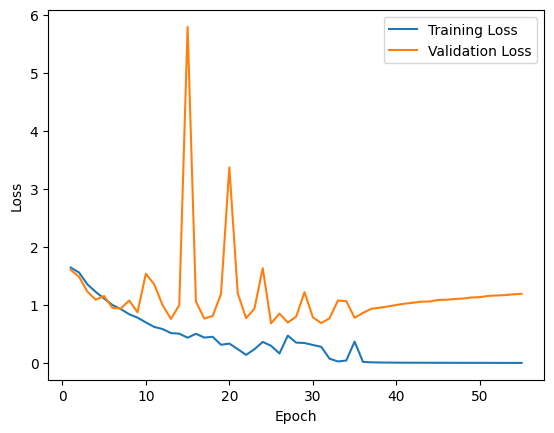

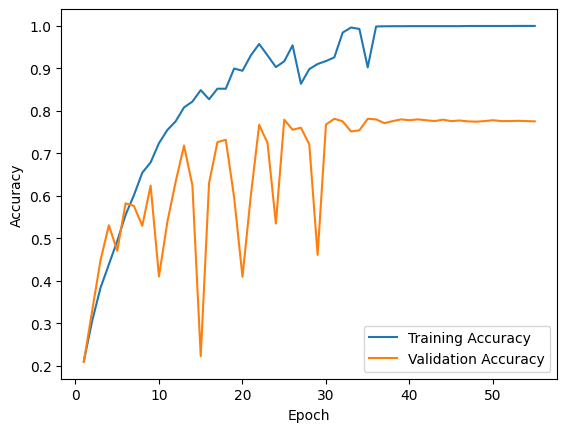

In [52]:
history.history.keys()
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
